## 3

### (a) First read in the data from wdbc.data, remove the patient i.d. and separate the features from the outputs. For matlab users you may find the csvread function useful.

In [1]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt

In [2]:
df = pd.read_csv("wdbc.data", header=None,sep = ",")
df

,0,1,2,3,4,5,6,7,8,9,...,22,23,24,25,26,27,28,29,30,31
0,842302,1,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,...,25.380,17.33,184.60,2019.0,0.16220,0.66560,0.7119,0.2654,0.4601,0.11890
1,842517,1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,...,24.990,23.41,158.80,1956.0,0.12380,0.18660,0.2416,0.1860,0.2750,0.08902
2,84300903,1,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,...,23.570,25.53,152.50,1709.0,0.14440,0.42450,0.4504,0.2430,0.3613,0.08758
3,84348301,1,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,...,14.910,26.50,98.87,567.7,0.20980,0.86630,0.6869,0.2575,0.6638,0.17300
4,84358402,1,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,...,22.540,16.67,152.20,1575.0,0.13740,0.20500,0.4000,0.1625,0.2364,0.07678
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,926424,1,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,...,25.450,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115
565,926682,1,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,...,23.690,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637
566,926954,1,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,...,18.980,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820
567,927241,1,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,...,25.740,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400


In [3]:
X_id = df[0]
y = np.ravel(df[1])
X_feature = np.array(df.drop([0, 1], axis=1))

In [4]:
y.shape,X_feature.shape

((569,), (569, 30))

### (b) Before we proceed any further we must normalize our data. This is the first thing to do when dealing with real data. Often the right form of normalization is to make sure our data set is zero mean and our features have the same Euclidean norm. More specifically, calculate the mean vector of patient features across all of the data set. That is $$\hat{x} = \frac{1}{569}\sum_{i=1}^{569}x_i$$
### Now substract the mean from each of the features. That is, set $x_i\leftarrow x_i-\hat{x}$. Then normalize the data.

In [5]:
X_feature_mean = X_feature.mean(axis = 0)
X_feature_norm0 = X_feature - X_feature_mean.reshape(1,30)

X_l2_norm = np.linalg.norm(X_feature_norm0, axis=1)
X_feature_data = X_feature_norm0/X_l2_norm.reshape(569,1)

### (c) Now that we have normalized data, partition it into train/test sets at random 100 times as discussed earlier. In each trial learn the model by solving (1) with λ = 0:01. To due this run gradient descent for T = 500 iterations and then use the trained model to make predictions on the test data and calculate the average error (average number of miss-classified patients on the test data) for each trial. Report the average over the 100 trials. The value of the step size you use does not matter too much. However, make sure that the algorithm has converged

In [13]:
data = np.hstack((y.reshape(569,1), X_feature_data))
data.shape

(569, 31)

In [8]:
lambd = 0.01
gamma = 0.03 
W1 = np.zeros((30, 100))
B1 = np.zeros(100)
Err = np.zeros(100)
n_iters = np.zeros((100, 1))
acc = np.zeros(500)

for i in range(100):
    np.random.shuffle(data)
    X_train, X_test, y_train, y_test = data[:500, 1:], data[500:, 1:], data[:500, 0], data[500:, 0]
    cur_w = np.ones(30)*10 
    cur_b = 10
    err = np.zeros(500)
    iters = 0 
    
    while(iters < 500):
    
        delta_w = ((-1)*np.sum(X_train*y_train.reshape(500,1),axis=0) + 
                 np.sum(X_train*(np.exp(np.dot(X_train,cur_w)+cur_b)/(1+np.exp(np.dot(X_train,cur_w)+cur_b))).reshape(500,1),axis=0) +
                 lambd*cur_w)
               
        delta_b = ((-1)*np.sum(y_train) + 
                 np.sum((np.exp(np.dot(X_train,cur_w)+cur_b))/(1+np.exp(np.dot(X_train,cur_w)+cur_b))))

        cur_w -= gamma * delta_w 
        cur_b -=  gamma * delta_b
        
        iters+=1
       
    test_pred = 1/(1+np.exp((-1)*(np.dot(X_test,cur_w)+cur_b)))
    tpre_label = test_pred > 0.5

    y_pred = tpre_label * np.ones(69)
    err_n = np.count_nonzero(y_pred != y_test)          
    
    n_iters[i] = iters
    Err[i] = err_n
    W1[:,i] = cur_w
    B1[i]= cur_b
avg_w = W1.mean(axis = 1)
avg_b = B1.mean()
avg_err = Err.mean()
avg_iters = n_iters.mean()
print("Average w is : ", avg_w, "\nAverage b is : ", avg_b, "\nAverage error is : ", avg_err,"\nAverage n_iters is ", avg_iters)

Average w is :  [ 8.78758706 12.45152131 12.32360123 -3.30137295  8.62963036  8.68512778
  8.72227042  8.65501021  8.64131044  8.6144217   8.5848185   8.76160471
  8.68415326  5.29460222  8.60883296  8.62344187  8.63152702  8.61312008
  8.60995782  8.60784917  9.06360079 15.82725558 16.59054982  4.14312325
  8.65533939  8.89506194  8.9828188   8.71698031  8.70165858  8.63923903] 
Average b is :  0.7742963101334037 
Average error is :  4.2 
Average n_iters is  500.0


### (f) Perform the experiment with the same step size you used before but now report the number of iterations it takes to get to an accuracy of 10−6 calculated via the first iteration t when the following inequality holds
$$||\nabla  f(w_t,b_t)||_{l_2}^2 ≤ 10^{−6} (1 + |f(w_t, b_t)|) $$
### The number you should report is the average of this number over the 100 trials.

In [17]:
lambd = 0.01
gamma = 0.03 
W1 = np.zeros((30, 100))
B1 = np.zeros(100)
Err = np.zeros(100)
n_iters = np.zeros((100, 1))
acc = np.zeros(20000)
stop_iter= np.zeros(100)

for i in range(100):
    np.random.shuffle(data)
    X_train, X_test, y_train, y_test = data[:500, 1:], data[500:, 1:], data[:500, 0], data[500:, 0]
    cur_w = np.ones(30)*10 
    cur_b = 10
    err = np.zeros(20000)
    iters = 0 
    
    while(iters < 20000):
        
        
        delta_w = ((-1)*np.sum(X_train*y_train.reshape(500,1),axis=0) + 
                 np.sum(X_train*(np.exp(np.dot(X_train,cur_w)+cur_b)/(1+np.exp(np.dot(X_train,cur_w)+cur_b))).reshape(500,1),axis=0) +
                 lambd*cur_w)
               
        delta_b = ((-1)*np.sum(y_train) + 
                 np.sum((np.exp(np.dot(X_train,cur_w)+cur_b))/(1+np.exp(np.dot(X_train,cur_w)+cur_b))))
        
        f = ((-1)*np.sum(np.dot(X_train,cur_w) * y_train) - np.sum(y_train * cur_b) +
             np.sum(np.log(1+np.exp(np.dot(X_train,cur_w)+cur_b))) + (lambd/2)*np.dot(cur_w,cur_w))
        
        temp =((np.linalg.norm(delta_w))**2 + delta_b**2)
        c = 10 ** (-6) *(1 + np.abs(f))
        
        if temp <= c:
            stop_iter[i] = iters
            break
        
        cur_w -= gamma * delta_w 
        cur_b -=  gamma * delta_b
        
        iters+=1 

        if (iters ==20000-1):
            print("Doesn't converge!")
       
    test_pred = 1/(1+np.exp((-1)*(np.dot(X_test,cur_w)+cur_b)))
    tpre_label = test_pred > 0.5

    y_pred = tpre_label * np.ones(69)
    err_n = np.count_nonzero(y_pred != y_test)           
            
    n_iters[i] = iters
    Err[i] = err_n
    W1[:,i] = cur_w
    B1[i]= cur_b
    
avg_w = W1.mean(axis = 1)
avg_b = B1.mean()
avg_err = Err.mean()
avg_iters = n_iters.mean()
print("Average w is : ", avg_w, "\nAverage b is : ", avg_b, "\nAverage error is : ", avg_err,"\nAverage n_iters is ", avg_iters)

Average w is :  [ 1.14065806 11.40547418 18.13431467 -4.24211734  0.33067302  0.57154843
  0.80609555  0.47873557  0.38144539  0.22666293  0.29411484  0.43154975
  0.54446797  7.72498898  0.20218321  0.23993725  0.30142993  0.22255455
  0.21011928  0.18990607  2.01664178 21.39904003 25.14339992  4.15925141
  0.47446528  1.3806341   1.92744249  0.75367156  0.67423048  0.32919152] 
Average b is :  0.7735146073669776 
Average error is :  3.8 
Average n_iters is  13262.32


### (e) Perform the experiment of part (d) but now add a momentum term (1) using the heavy ball method and (2) using Nesterov’s accelerated scheme. In both cases keep the same step size as part (d) but fine tune the momentum parameter to get the smallest number of iterations for convergence based on the stopping criteria (2) (again averaged over the 100 trials). Draw the convergence of the three algorithms gradient descent, heavy ball, Nesterov’s accelerated scheme for one trial. That is, draw the ratio

### (1) Heavy ball method

#### pre-test, find the $\eta$ , when $\eta = [0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9]$

In [18]:
etas = [0.1 * i for i in range(11)]
np.random.shuffle(data)
X_train, X_test, y_train, y_test = data[:500, 1:], data[500:, 1:], data[:500, 0], data[500:, 0]
stop_iter = np.zeros(len(etas))
    
for i , eta in enumerate(etas):
    cur_w = np.ones(30)*10 # The algorithm starts at w0 = 0.5
    cur_b = 10

    pre_w = cur_w
    pre_b = cur_b
    
    diff_w = cur_w - pre_w
    diff_b = cur_b - pre_b
    
    err = np.zeros(20000)
    iters = 0 

    while(iters < 20000):
        pre_w = cur_w
        pre_b = cur_b

        delta_w = ((-1)*np.sum(X_train*y_train.reshape(500,1),axis=0) + 
                 np.sum(X_train*(np.exp(np.dot(X_train,cur_w)+cur_b)/(1+np.exp(np.dot(X_train,cur_w)+cur_b))).reshape(500,1),axis=0) +
                 lambd*cur_w)

        delta_b = ((-1)*np.sum(y_train) + 
                 np.sum((np.exp(np.dot(X_train,cur_w)+cur_b))/(1+np.exp(np.dot(X_train,cur_w)+cur_b))))

        f = ((-1)*np.sum(np.dot(X_train,cur_w) * y_train) - np.sum(y_train * cur_b) +
             np.sum(np.log(1+np.exp(np.dot(X_train,cur_w)+cur_b))) + (lambd/2)*np.dot(cur_w,cur_w))

        temp =((np.linalg.norm(delta_w))**2 + delta_b**2)
        c = 10 ** (-6) *(1 + np.abs(f))

        if temp <= c:
            break

        cur_w = cur_w - gamma * delta_w + eta * diff_w
        cur_b = cur_b - gamma * delta_b + eta * diff_b
        
        diff_w = cur_w - pre_w
        diff_b = cur_b - pre_b
        
        iters+=1 

    if (iters ==20000-1):
        print("Doesn't converge!")
        break
    
    test_pred = 1/(1+np.exp((-1)*(np.dot(X_test,cur_w)+cur_b)))
    tpre_label = test_pred > 0.5

    y_pred = tpre_label * np.ones(69)
    err_n = np.count_nonzero(y_pred != y_test)
    
    print('eta:%f,iteration :%d,test error:%f '%((eta,iters,err_n)))

eta:0.000000,iteration :13354,test error:5.000000 
eta:0.100000,iteration :12018,test error:5.000000 
eta:0.200000,iteration :10682,test error:5.000000 
eta:0.300000,iteration :9346,test error:5.000000 
eta:0.400000,iteration :8010,test error:5.000000 
eta:0.500000,iteration :6673,test error:5.000000 
eta:0.600000,iteration :5336,test error:5.000000 
eta:0.700000,iteration :3998,test error:5.000000 
eta:0.800000,iteration :2657,test error:5.000000 
eta:0.900000,iteration :1306,test error:5.000000 


D:\anaconda3\lib\site-packages\ipykernel_launcher.py:24: RuntimeWarning: overflow encountered in exp
D:\anaconda3\lib\site-packages\ipykernel_launcher.py:24: RuntimeWarning: invalid value encountered in true_divide
D:\anaconda3\lib\site-packages\ipykernel_launcher.py:28: RuntimeWarning: overflow encountered in exp
D:\anaconda3\lib\site-packages\ipykernel_launcher.py:28: RuntimeWarning: invalid value encountered in true_divide
D:\anaconda3\lib\site-packages\ipykernel_launcher.py:31: RuntimeWarning: overflow encountered in exp


eta:1.000000,iteration :20000,test error:30.000000 


D:\anaconda3\lib\site-packages\ipykernel_launcher.py:52: RuntimeWarning: invalid value encountered in greater


### From the iteration results, use 100 trials and try from 0.85 to 1.00

In [19]:
lambd = 0.01
gamma = 0.03 

err_sum = []
iter_sum = []

etas = [0.85 + 0.01 * i for i in range(15)]

for i , eta in enumerate(etas):
    
    Err = np.zeros(100)
    stop_iter= np.zeros(100)
    W1 = np.zeros((100, 30))
    B1 = np.zeros(100)
    
    for j in range(100):
        
    
        np.random.shuffle(data)
        X_train, X_test, y_train, y_test = data[:500, 1:], data[500:, 1:], data[:500, 0], data[500:, 0]

        cur_w = np.ones(30)*10 
        cur_b = 10
        pre_w = cur_w
        pre_b = cur_b

        diff_w = cur_w - pre_w
        diff_b = cur_b - pre_b

        iters = 0 

        while(iters < 20000):
            pre_w = cur_w
            pre_b = cur_b

            delta_w = ((-1)*np.sum(X_train*y_train.reshape(500,1),axis=0) + 
                     np.sum(X_train*(np.exp(np.dot(X_train,cur_w)+cur_b)/(1+np.exp(np.dot(X_train,cur_w)+cur_b))).reshape(500,1),axis=0) +
                     lambd*cur_w)

            delta_b = ((-1)*np.sum(y_train) + 
                     np.sum((np.exp(np.dot(X_train,cur_w)+cur_b))/(1+np.exp(np.dot(X_train,cur_w)+cur_b))))

            f = ((-1)*np.sum(np.dot(X_train,cur_w) * y_train) - np.sum(y_train * cur_b) +
                 np.sum(np.log(1+np.exp(np.dot(X_train,cur_w)+cur_b))) + (lambd/2)*np.dot(cur_w,cur_w))

            temp =((np.linalg.norm(delta_w))**2 + delta_b**2)
            c = 10 ** (-6) *(1 + np.abs(f))

            if temp <= c:
                stop_iter[j] = iters
                break

            cur_w = cur_w - gamma * delta_w + eta * diff_w
            cur_b = cur_b - gamma * delta_b + eta * diff_b

            diff_w = cur_w - pre_w
            diff_b = cur_b - pre_b

            iters += 1 

        if (iters ==20000-1):
            stop_iter[j] = iters
            print("Doesn't converge!")

        test_pred = 1/(1+np.exp((-1)*(np.dot(X_test,cur_w)+cur_b)))
        tpre_label = test_pred > 0.5

        y_pred = tpre_label * np.ones(69)
        err_n = np.count_nonzero(y_pred != y_test)

        Err[j] = err_n
        W1[j] = cur_w
        B1[j] = cur_b
    
    avg_w = W1.mean(axis = 0)
    avg_b = B1.mean()
    avg_err = Err.mean()
    avg_iters = stop_iter.mean()
    print("--------------------------------------------------------------------")
    print('For the momentum parameter: %f'%eta,"\nAverage w is : ", avg_w, "\nAverage b is : ", avg_b, "\nAverage error is : ", avg_err,"\nAverage n_iters is ", avg_iters)
    err_sum.append(Err)
    iter_sum.append(stop_iter)

--------------------------------------------------------------------
For the momentum parameter: 0.850000 
Average w is :  [ 1.19317095 11.2534665  18.06975227 -4.18471883  0.32889061  0.55658254
  0.79299804  0.47377742  0.37765133  0.22372057  0.3032188   0.5166796
  0.63571676  8.05544476  0.2015832   0.23183007  0.29541878  0.22151281
  0.20608587  0.18859165  2.08719235 21.39570608 25.0561874   4.10925871
  0.47145201  1.33679182  1.89699207  0.74440638  0.65581282  0.32359096] 
Average b is :  0.7735580856046887 
Average error is :  3.81 
Average n_iters is  1971.13
--------------------------------------------------------------------
For the momentum parameter: 0.860000 
Average w is :  [ 1.18990208 11.5373282  18.14087434 -4.25812558  0.32874781  0.56228146
  0.79701053  0.47620619  0.37912055  0.22477651  0.2987048   0.48351358
  0.59583915  7.6663299   0.20225176  0.23571561  0.29770869  0.22231761
  0.20823409  0.18935137  2.13018148 21.59922236 25.14832925  4.16084932
  0.47

--------------------------------------------------------------------
For the momentum parameter: 0.990000 
Average w is :  [ 9.70118941e-01  1.12640681e+01  1.79038935e+01 -4.22031567e+00
  1.42823719e-01  3.76809236e-01  6.16000045e-01  2.89507079e-01
  1.87750111e-01  3.69284104e-02  1.14710941e-01  3.37347149e-01
  4.42401085e-01  8.00389569e+00  1.36302740e-02  4.71197210e-02
  1.09179024e-01  3.40519679e-02  1.88835128e-02  1.10573930e-03
  1.89705991e+00  2.16191813e+01  2.52850499e+01  4.13353257e+00
  2.88513874e-01  1.17921040e+00  1.73515937e+00  5.65095586e-01
  4.75557584e-01  1.39276994e-01] 
Average b is :  0.7757281397623293 
Average error is :  4.03 
Average n_iters is  1431.08


In [20]:
print('the best eta is : %f'%(etas[np.argmin(np.mean(iter_sum,axis = 1))]),'the average iteration is:%f'%np.min(np.mean(iter_sum,axis =1)))

the best eta is : 0.960000 the average iteration is:447.120000


### (2) Nesterov’s accelerated scheme

In [22]:
etas = [ 0.1* i for i in range(15)]
np.random.shuffle(data)
X_train, X_test, y_train, y_test = data[:500, 1:], data[500:, 1:], data[:500, 0], data[500:, 0]
stop_iter = np.zeros(len(etas))
    
for i , eta in enumerate(etas):
    cur_w = np.ones(30)*10 
    cur_b = 10

    pre_w = cur_w
    pre_b = cur_b
    
    diff_w = cur_w - pre_w
    diff_b = cur_b - pre_b
    
    z_w = cur_w
    z_b = cur_b
    
    err = np.zeros(20000)
    iters = 0 

    while(iters < 20000):
        pre_w = cur_w
        pre_b = cur_b

        delta_w = ((-1)*np.sum(X_train*y_train.reshape(500,1),axis=0) + 
                 np.sum(X_train*(np.exp(np.dot(X_train,z_w)+z_b)/(1+np.exp(np.dot(X_train,z_w)+z_b))).reshape(500,1),axis=0) +
                 lambd*z_w)

        delta_b = ((-1)*np.sum(y_train) + 
                 np.sum((np.exp(np.dot(X_train,z_w)+z_b))/(1+np.exp(np.dot(X_train,z_w)+z_b))))

        f = ((-1)*np.sum(np.dot(X_train,cur_w) * y_train) - np.sum(y_train * cur_b) +
             np.sum(np.log(1+np.exp(np.dot(X_train,cur_w)+cur_b))) + (lambd/2)*np.dot(cur_w,cur_w))

        temp =((np.linalg.norm(delta_w))**2 + delta_b**2)
        c = 10 ** (-6) *(1 + np.abs(f))

        if temp <= c:
            break

        cur_w = z_w - gamma * delta_w 
        cur_b = z_b - gamma * delta_b 
        
        diff_w = cur_w - pre_w
        diff_b = cur_b - pre_b
        
        z_w = cur_w + eta * diff_w
        z_b = cur_b + eta * diff_b
        
        iters+=1 

    if (iters ==20000-1):
        print("Doesn't converge!")
        break
    
    test_pred = 1/(1+np.exp((-1)*(np.dot(X_test,cur_w)+cur_b)))
    tpre_label = test_pred > 0.5

    y_pred = tpre_label * np.ones(69)
    err_n = np.count_nonzero(y_pred != y_test)
    
    print('eta:%f,iteration :%d,test error:%f '%((eta,iters,err_n)))

eta:0.000000,iteration :13305,test error:4.000000 
eta:0.100000,iteration :11974,test error:4.000000 
eta:0.200000,iteration :10643,test error:4.000000 
eta:0.300000,iteration :9313,test error:4.000000 
eta:0.400000,iteration :7982,test error:4.000000 
eta:0.500000,iteration :6650,test error:4.000000 
eta:0.600000,iteration :5318,test error:4.000000 
eta:0.700000,iteration :3986,test error:4.000000 
eta:0.800000,iteration :2650,test error:4.000000 
eta:0.900000,iteration :1304,test error:4.000000 
eta:1.000000,iteration :12419,test error:4.000000 


D:\anaconda3\lib\site-packages\ipykernel_launcher.py:27: RuntimeWarning: overflow encountered in exp
D:\anaconda3\lib\site-packages\ipykernel_launcher.py:27: RuntimeWarning: invalid value encountered in true_divide
D:\anaconda3\lib\site-packages\ipykernel_launcher.py:31: RuntimeWarning: overflow encountered in exp
D:\anaconda3\lib\site-packages\ipykernel_launcher.py:31: RuntimeWarning: invalid value encountered in true_divide
D:\anaconda3\lib\site-packages\ipykernel_launcher.py:58: RuntimeWarning: invalid value encountered in greater


eta:1.100000,iteration :20000,test error:29.000000 
eta:1.200000,iteration :20000,test error:29.000000 
eta:1.300000,iteration :20000,test error:29.000000 
eta:1.400000,iteration :20000,test error:29.000000 


In [24]:
lambd = 0.01
gamma = 0.03 

err_sum = []
iter_sum = []

etas = [0.85 + 0.01 * i for i in range(15)]

for i , eta in enumerate(etas):
    
    Err = np.zeros(100)
    stop_iter= np.zeros(100)
    W1 = np.zeros((100, 30))
    B1 = np.zeros(100)
    
    for j in range(100):
        
        np.random.shuffle(data)
        X_train, X_test, y_train, y_test = data[:500, 1:], data[500:, 1:], data[:500, 0], data[500:, 0]

        cur_w = np.ones(30)*10
        cur_b = 10
        pre_w = cur_w
        pre_b = cur_b
        z_w = cur_w
        z_b = cur_b

        diff_w = cur_w - pre_w
        diff_b = cur_b - pre_b

        iters = 0 

        while(iters < 20000):
            pre_w = cur_w
            pre_b = cur_b

            delta_w = ((-1)*np.sum(X_train*y_train.reshape(500,1),axis=0) + 
                     np.sum(X_train*(np.exp(np.dot(X_train,z_w)+z_b)/(1+np.exp(np.dot(X_train,z_w)+z_b))).reshape(500,1),axis=0) +
                     lambd*z_w)

            delta_b = ((-1)*np.sum(y_train) + 
                     np.sum((np.exp(np.dot(X_train,z_w)+z_b))/(1+np.exp(np.dot(X_train,z_w)+z_b))))

            f = ((-1)*np.sum(np.dot(X_train,cur_w) * y_train) - np.sum(y_train * cur_b) +
                 np.sum(np.log(1+np.exp(np.dot(X_train,cur_w)+cur_b))) + (lambd/2)*np.dot(cur_w,cur_w))

            temp =((np.linalg.norm(delta_w))**2 + delta_b**2)
            c = 10 ** (-6) *(1 + np.abs(f))

            if temp <= c:
                stop_iter[j] = iters
                break

            cur_w = z_w - gamma * delta_w 
            cur_b = z_b - gamma * delta_b 

            diff_w = cur_w - pre_w
            diff_b = cur_b - pre_b
        
            z_w = cur_w + eta * diff_w
            z_b = cur_b + eta * diff_b
            
            iters += 1 

        if (iters ==20000-1):
            stop_iter[j] = iters
            print("Doesn't converge!")

        test_pred = 1/(1+np.exp((-1)*(np.dot(X_test,cur_w)+cur_b)))
        tpre_label = test_pred > 0.5

        y_pred = tpre_label * np.ones(69)
        err_n = np.count_nonzero(y_pred != y_test)

        Err[j] = err_n
        W1[j] = cur_w
        B1[j] = cur_b
    
    avg_w = W1.mean(axis = 0)
    avg_b = B1.mean()
    avg_err = Err.mean()
    avg_iters = stop_iter.mean()
    print("--------------------------------------------------------------------")
    print('For the momentum parameter: %f'%eta,"\nAverage w is : ", avg_w, "\nAverage b is : ", avg_b, "\nAverage error is : ", avg_err,"\nAverage n_iters is ", avg_iters)
    err_sum.append(Err)
    iter_sum.append(stop_iter)

--------------------------------------------------------------------
For the momentum parameter: 0.850000 
Average w is :  [ 1.17850583 11.15792701 18.18185961 -4.20498927  0.33053826  0.56703122
  0.80364988  0.47784797  0.38222986  0.2259145   0.29947409  0.58455313
  0.62029881  7.83877787  0.20255035  0.23748704  0.29981376  0.22269568
  0.20870779  0.18962023  2.10081624 21.59006495 25.17566572  4.13028856
  0.47619539  1.36830872  1.92379813  0.75381031  0.66966415  0.32766161] 
Average b is :  0.7802413110036143 
Average error is :  3.75 
Average n_iters is  1973.37
--------------------------------------------------------------------
For the momentum parameter: 0.860000 
Average w is :  [ 1.19694437 11.42373045 18.36267123 -4.19652706  0.32948798  0.56837353
  0.80509085  0.47688872  0.38318171  0.22555163  0.30380147  0.52478406
  0.66833527  8.09112393  0.20238916  0.23923707  0.30142718  0.22234196
  0.20966131  0.18971526  2.12716456 21.5421781  25.0969031   4.10115332
  0.4

In [25]:
print('the best eta is : %f'%(etas[np.argmin(np.mean(iter_sum,axis = 1))]),'the average iteration is:%f'%np.min(np.mean(iter_sum,axis =1)))

the best eta is : 0.970000 the average iteration is:294.350000


### Draw the convergence of the three algorithms gradient descent, heavy ball, Nesterov’s accelerated scheme for one trial. That is, draw the ratio$$\frac{||\nabla  f(w_t,b_t)||_{l_2}^2}{ (1 + |f(w_t, b_t)|)} $$ as a function of the iteration number t = 1; 2; ...; 500. Which algorithm would you use and why?

In [26]:
np.random.shuffle(data)
X_train, X_test, y_train, y_test = data[:500, 1:], data[500:, 1:], data[:500, 0], data[500:, 0]

In [27]:
ratio_nest = []
lambd = 0.01
gamma = 0.03 
eta = 0.97
cur_w = np.ones(30)*10 
cur_b = 10

pre_w = cur_w
pre_b = cur_b

diff_w = cur_w - pre_w
diff_b = cur_b - pre_b

z_w = cur_w
z_b = cur_b

iters = 0 
for i in range(500):
    pre_w = cur_w
    pre_b = cur_b

    delta_w = ((-1)*np.sum(X_train*y_train.reshape(500,1),axis=0) + 
             np.sum(X_train*(np.exp(np.dot(X_train,z_w)+z_b)/(1+np.exp(np.dot(X_train,z_w)+z_b))).reshape(500,1),axis=0) +
             lambd*z_w)

    delta_b = ((-1)*np.sum(y_train) + 
             np.sum((np.exp(np.dot(X_train,z_w)+z_b))/(1+np.exp(np.dot(X_train,z_w)+z_b))))

    f = ((-1)*np.sum(np.dot(X_train,cur_w) * y_train) - np.sum(y_train * cur_b) +
         np.sum(np.log(1+np.exp(np.dot(X_train,cur_w)+cur_b))) + (lambd/2)*np.dot(cur_w,cur_w))

    temp =((np.linalg.norm(delta_w))**2 + delta_b**2)
    ratio_nest.append(temp/(1 + np.abs(f)))

    cur_w = z_w - gamma * delta_w 
    cur_b = z_b - gamma * delta_b 

    diff_w = cur_w - pre_w
    diff_b = cur_b - pre_b

    z_w = cur_w + eta * diff_w
    z_b = cur_b + eta * diff_b

In [28]:
ratio_ball = []
lambd = 0.01
gamma = 0.03 
eta = 0.97
cur_w = np.ones(30)*10 # 
cur_b = 10

pre_w = cur_w
pre_b = cur_b

diff_w = cur_w - pre_w
diff_b = cur_b - pre_b

for i in range(500):
    pre_w = cur_w
    pre_b = cur_b

    delta_w = ((-1)*np.sum(X_train*y_train.reshape(500,1),axis=0) + 
             np.sum(X_train*(np.exp(np.dot(X_train,cur_w)+cur_b)/(1+np.exp(np.dot(X_train,cur_w)+cur_b))).reshape(500,1),axis=0) +
             lambd*cur_w)

    delta_b = ((-1)*np.sum(y_train) + 
             np.sum((np.exp(np.dot(X_train,cur_w)+cur_b))/(1+np.exp(np.dot(X_train,cur_w)+cur_b))))

    f = ((-1)*np.sum(np.dot(X_train,cur_w) * y_train) - np.sum(y_train * cur_b) +
         np.sum(np.log(1+np.exp(np.dot(X_train,cur_w)+cur_b))) + (lambd/2)*np.dot(cur_w,cur_w))

    temp =((np.linalg.norm(delta_w))**2 + delta_b**2)
    ratio_ball.append(temp/(1 + np.abs(f)))
    
    cur_w = cur_w - gamma * delta_w + eta * diff_w
    cur_b = cur_b - gamma * delta_b + eta * diff_b

    diff_w = cur_w - pre_w
    diff_b = cur_b - pre_b

In [29]:
ratio_grad = []
lambd = 0.01
gamma = 0.03 
eta = 0
cur_w = np.ones(30)*10
cur_b = 10

for i in range(500):

    delta_w = ((-1)*np.sum(X_train*y_train.reshape(500,1),axis=0) + 
             np.sum(X_train*(np.exp(np.dot(X_train,cur_w)+cur_b)/(1+np.exp(np.dot(X_train,cur_w)+cur_b))).reshape(500,1),axis=0) +
             lambd*cur_w)

    delta_b = ((-1)*np.sum(y_train) + 
             np.sum((np.exp(np.dot(X_train,cur_w)+cur_b))/(1+np.exp(np.dot(X_train,cur_w)+cur_b))))

    f = ((-1)*np.sum(np.dot(X_train,cur_w) * y_train) - np.sum(y_train * cur_b) +
         np.sum(np.log(1+np.exp(np.dot(X_train,cur_w)+cur_b))) + (lambd/2)*np.dot(cur_w,cur_w))

    temp =((np.linalg.norm(delta_w))**2 + delta_b**2)
    ratio_grad.append(temp/(1 + np.abs(f)))
    
    cur_w -= gamma * delta_w
    cur_b -= gamma * delta_b

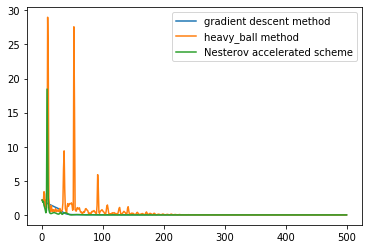

In [30]:
x = [i + 1 for i in range(500)]
plt.plot(x,ratio_grad,x,ratio_ball,x,ratio_nest)
plt.legend(['gradient descent method','heavy_ball method','Nesterov accelerated scheme'])

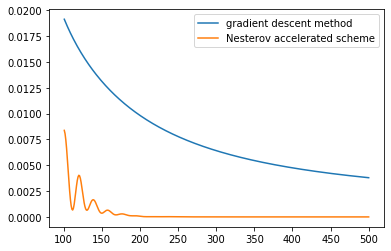

In [31]:
plt.plot(x[100:],ratio_grad[100:],x[100:],ratio_nest[100:])
plt.legend(['gradient descent method','Nesterov accelerated scheme'])

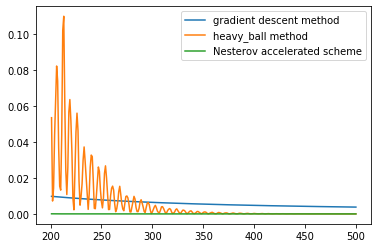

In [32]:
plt.plot(x[200:],ratio_grad[200:],x[200:],ratio_ball[200:],x[200:],ratio_nest[200:])
plt.legend(['gradient descent method','heavy_ball method','Nesterov accelerated scheme'])

### Answer: I would use Nesterov’s method because it converges fastest